In [164]:
#(A) Here we will first model imputing Null Values without (any loss of Data) 

import pandas as pd
import numpy as np
data=pd.read_csv("train.csv")
import matplotlib.pyplot as plt 
%matplotlib inline 

In [165]:
## Data-set has nullvalues--Age,Cabin & Embarked columns 
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
# Null Value Imputation 


from sklearn.preprocessing import Imputer

imputer=Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer.fit(data.iloc[:,[5]])

data.iloc[:,[5]]=imputer.fit_transform(data.iloc[:,[5]])

data["Embarked"]=data[["Embarked"]].fillna(data.mode().iloc[0])

data["Cabin"]=data[["Cabin"]].fillna(data.mode().iloc[0])




C:\Users\joydeep\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [167]:
print(data.shape)
data.isnull().sum()

(891, 12)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [168]:
# Relevant Category columns are converted in dummy variables .

Cat=["Sex","Cabin","Embarked"]
for i in Cat:
    data[i]=pd.get_dummies(data[i])
    
data.head()

data.dtypes
data.shape

(891, 12)

In [183]:
# Creating Design Matrix & Independent Variable 
X=data[["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]]
y=data.iloc[:,1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)


In [184]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 8), (268, 8), (623,), (268,))

In [187]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
lr.score(X_test,y_test)

0.8089887640449438


C:\Users\joydeep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7798507462686567

In [129]:
# Remove Outliers --Age 

data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.998878,0.811448
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.033501,0.391372
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [139]:
##Outliers 
dATA_OUTLIERS=data[(data.Age-data.Age.mean())>3*data.Age.std()]
dATA_OUTLIERS

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,0,1
116,117,0,3,"Connors, Mr. Patrick",0,70.5,0,0,370369,7.7500,0,0
493,494,0,1,"Artagaveytia, Mr. Ramon",0,71.0,0,0,PC 17609,49.5042,0,1
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0000,0,0
672,673,0,2,"Mitchell, Mr. Henry Michael",0,70.0,0,0,C.A. 24580,10.5000,0,0
745,746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,0,0
851,852,0,3,"Svensson, Mr. Johan",0,74.0,0,0,347060,7.7750,0,0


7


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

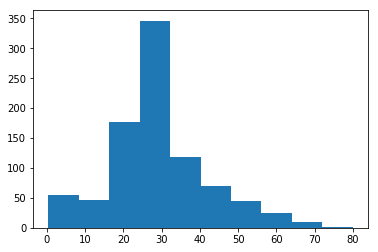

In [141]:
print(len(dATA_OUTLIERS)) ## 7 observations qualifies as outliers as they fall outside +3std() from mean()

plt.hist(data.Age)

In [172]:
df2=data[np.abs(data.Age-data.Age.mean())<=3*data.Age.std()]

In [173]:
df2.shape

(884, 12)

In [174]:
data.shape

(891, 12)

In [157]:
Cat=["Sex","Cabin","Embarked"]
for i in Cat:
    df2[i]=pd.get_dummies(df2[i])
    
df2.head()

df2.dtypes

C:\Users\joydeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              uint8
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            uint8
Embarked         uint8
dtype: object

In [190]:
X=df2[["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]]
y=df2.iloc[:,1]
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3,random_state=4)


In [176]:
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

((618, 8), (266, 8), (618,), (266,))

In [191]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train1,y_train1)
print(lr.score(X_train1,y_train1))
lr.score(X_test1,y_test1)

0.7977346278317152


C:\Users\joydeep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8007518796992481

In [180]:
df2.Age.mean() ## After removing the outliers 

29.36132785467122

In [162]:
data.Age.mean() ## Original dataset 

29.699117647058763